<a href="https://colab.research.google.com/github/ayush9304/BikeSharingDemandPrediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team
##### **Team Member 1 - Ayush Kumar**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[https://github.com/ayush9304/BikeSharingDemandPrediction](https://github.com/ayush9304/BikeSharingDemandPrediction)

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


The business problem is to ensure a stable supply of rental bikes in urban cities by predicting the demand for bikes at each hour. By providing a stable supply of rental bikes, the system can enhance mobility comfort for the public and reduce waiting time, leading to greater customer satisfaction.

To address this problem, we need to develop a predictive model that takes into account various factors that may influence demand, such as time of day, seasonality, weather conditions, and holidays. By accurately predicting demand, the bike sharing system operators can ensure that there is an adequate supply of bikes available at all times, which can improve the user experience and increase usage of the bike sharing system. This can have a positive impact on the sustainability of urban transportation, as it can reduce congestion, air pollution, and greenhouse gas emissions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [350]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

### Dataset Loading

In [96]:
# Load Dataset
dataset = pd.read_csv("https://github.com/ayush9304/BikeSharingDemandPrediction/raw/main/SeoulBikeData.csv", encoding="latin")

### Dataset First View

In [3]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<AxesSubplot:>

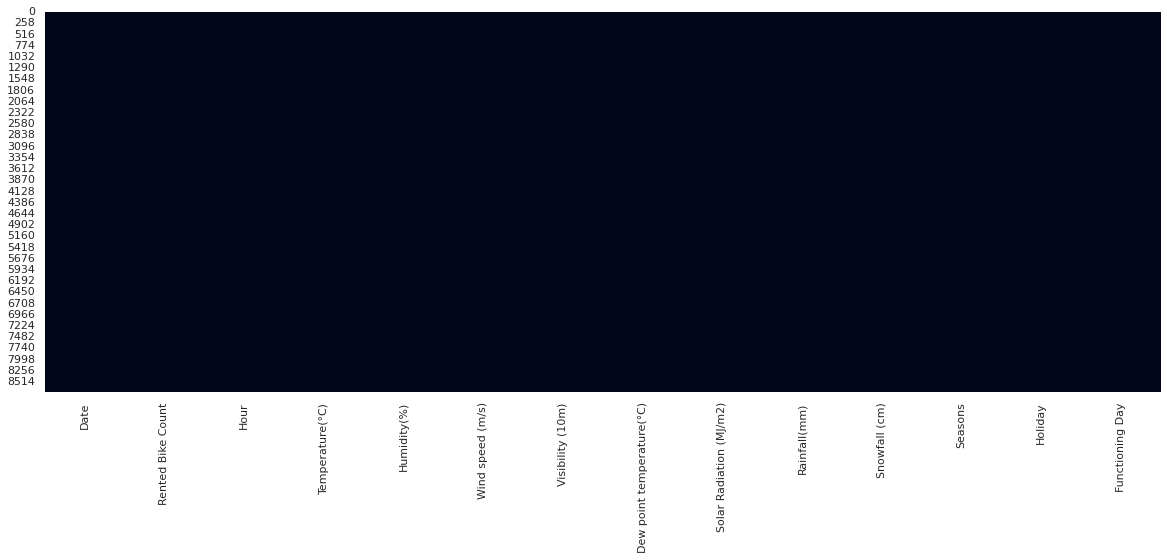

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018. It includes hourly observations of 14 columns, such as the date, time, number of rented bikes, weather conditions, and other factors that may influence bike rental demand.

This dataset contains more than 8000 rows and 14 columns of the data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

*   **Date**: The date of the observation.
*   **Rented Bike Count**: The number of bikes rented during the observation period.
*   **Hour**: The hour of the day when the observation was taken.
*   **Temperature(°C)**: The temperature in Celsius at the time of observation.
*   **Humidity(%)**: The percentage of humidity at the time of observation.
*   **Wind speed (m/s)**: The wind speed in meters per second at the time of observation.
*   **Visibility (10m)**: The visibility in meters at the time of observation.
*   **Dew point temperature(°C)**: The dew point temperature in Celsius at the time of observation.
*   **Solar Radiation (MJ/m2)**: The amount of solar radiation in mega-joules per square meter at the time of observation.
*   **Rainfall(mm)**: The amount of rainfall in millimeters during the observation period.
*   **Snowfall(cm)**: The amount of snowfall in centimeters during the observation period.
*   **Seasons**: The season of the year when the observation was taken.
*   **Holiday**: Whether the observation was taken on a holiday or not.
*   **Functioning Day**: Whether the bike sharing system was operating normally or not during the observation period.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [97]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()
df.shape

(8760, 14)

In [98]:
# Changing the "Date" column dtype to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [99]:
# Creating new columns Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()  # we better understand names (monday, friday etc) instead of numbers

In [ ]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday


In [ ]:
# Unique hours 
df['Hour'].unique()    # It is in 24hrs format

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# Year wise Rented Bike Count
df.groupby('Year')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2017,744.0,249.099462,158.396544,3.0,131.75,236.5,329.0,937.0
2018,8016.0,746.879242,656.708588,0.0,206.00,586.0,1117.0,3556.0


In [ ]:
# weekday wise Rented Bike Count
df.groupby('weekday')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Friday,1272.0,747.117925,658.396481,0.0,233.00,566.0,1115.25,3365.0
Monday,1248.0,730.563301,664.960809,2.0,186.00,533.0,1099.00,3380.0
Saturday,1248.0,709.528846,603.913165,0.0,219.00,519.0,1076.00,2497.0
Sunday,1248.0,625.155449,605.529274,0.0,158.75,406.0,936.50,2514.0
Thursday,1248.0,690.704327,641.675659,0.0,185.00,495.0,1049.00,3418.0
Tuesday,1248.0,687.977564,652.165697,0.0,179.50,485.5,1031.50,3556.0
Wednesday,1248.0,740.349359,677.573675,0.0,206.75,536.5,1107.25,3384.0


In [ ]:
# Season wise Rented Bike Count
df.groupby('Seasons')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Seasons,,,,,,,,
Autumn,2184.0,819.597985,651.085621,0.0,241.75,763.5,1197.50,3298.0
Spring,2208.0,730.031250,621.509635,0.0,206.00,583.0,1105.25,3251.0
Summer,2208.0,1034.073370,690.244759,9.0,526.75,905.5,1442.50,3556.0
Winter,2160.0,225.541204,150.372236,3.0,110.00,203.0,305.00,937.0


In [ ]:
# Holiday wise Rented Bike Count
df.groupby('Holiday')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday,,,,,,,,
Holiday,432.0,499.756944,570.772769,0.0,105.75,240.0,762.5,2400.0
No Holiday,8328.0,715.228026,646.879124,0.0,200.00,524.5,1073.0,3556.0


In [100]:
# Changing Hour, Year, Month dtypes to categorical
for col in ['Year', 'Month', 'Day']:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Statistical properties of Rented Bike Count
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
# Functioning Day wise Rented Bike Count
df.groupby('Functioning Day')['Rented Bike Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Functioning Day,,,,,,,,
No,295.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Yes,8465.0,729.156999,642.351166,2.0,214.0,542.0,1084.0,3556.0


In [101]:
# Creating Temperature bin of 1°C intervals that will help in visualizations
df['Temperature Bin'] = df['Temperature(°C)'].round(0).astype('int64')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Histogram & Box-plot for distribution of Rented Bike Count

Text(0.5, 1.0, 'Rented Bike Count Box Plot')

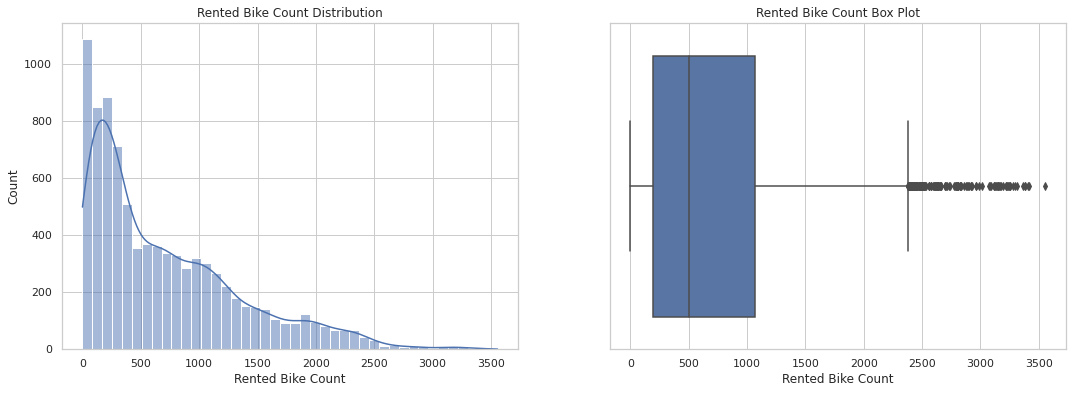

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='Rented Bike Count', data=df, kde=True)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,2,2)
sns.boxplot(x='Rented Bike Count', data = df)
plt.title("Rented Bike Count Box Plot")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Rented Bike Count by Seasons

Text(0.5, 1.0, 'Rented Bike Count by Seasons')

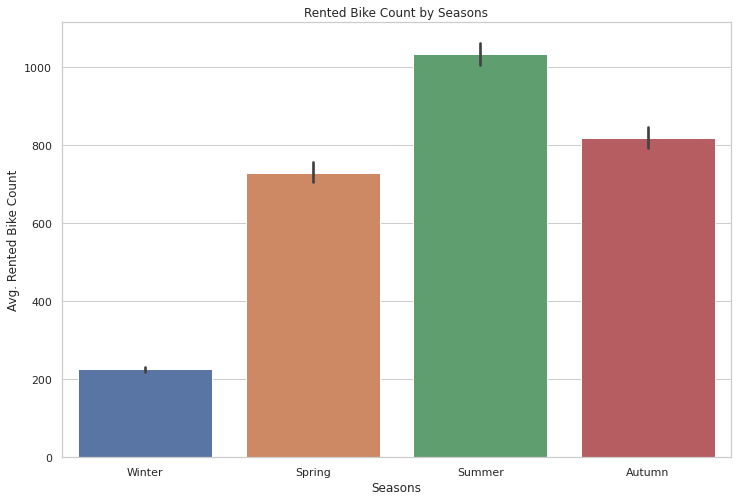

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df)
plt.xlabel("Seasons")
plt.ylabel("Avg. Rented Bike Count")
plt.title("Rented Bike Count by Seasons")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Rented Bike Count trend by Hour

Text(0.5, 1.0, 'Rented Bike Count trend by Hour')

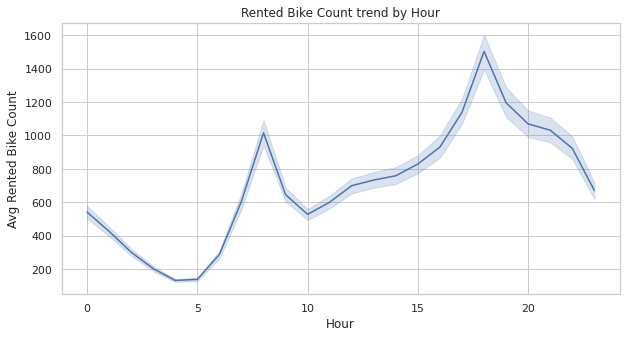

In [103]:
# Average Rented Bike Count by Hour
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Avg. Rented Bike Count by Months

Text(0.5, 1.0, 'Rented Bike Count by Months')

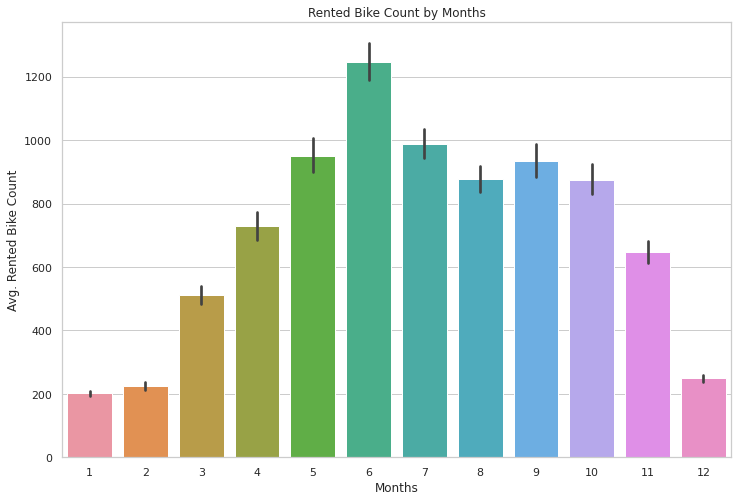

In [104]:
plt.figure(figsize = (12,8))
sns.barplot(x='Month', y='Rented Bike Count', data=df)
plt.xlabel("Months")
plt.ylabel("Avg. Rented Bike Count")
plt.title("Rented Bike Count by Months")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Average Rented Bike Count by Temperature(°C)

Text(0.5, 1.0, 'Rented Bike Count trend by Temperature(°C)')

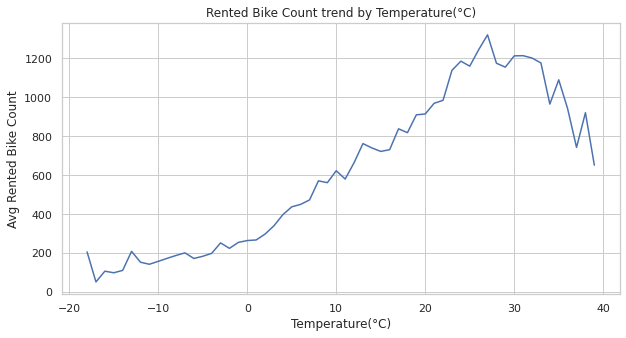

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('Temperature Bin')['Rented Bike Count'].mean().plot(kind='line')
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Temperature(°C)")
plt.title("Rented Bike Count trend by Temperature(°C)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Average Rented Bike Count by Dew point temperature(°C)

Text(0.5, 1.0, 'Rented Bike Count trend by Dew point temperature(°C)')

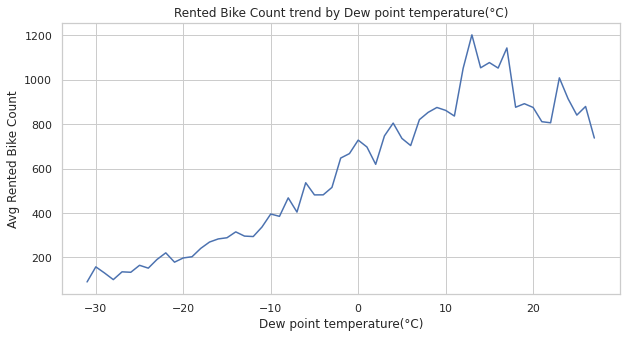

In [ ]:
d = df.copy()
d['Dew point temperature(°C) Bin'] = d['Dew point temperature(°C)'].round(0).astype('int64')

plt.figure(figsize=(10,5))
d.groupby('Dew point temperature(°C) Bin')['Rented Bike Count'].mean().plot(kind='line')
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Dew point temperature(°C)")
plt.title("Rented Bike Count trend by Dew point temperature(°C)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Rented Bike Count by Functioning Day

Text(0, 0.5, 'Rented Bike Count')

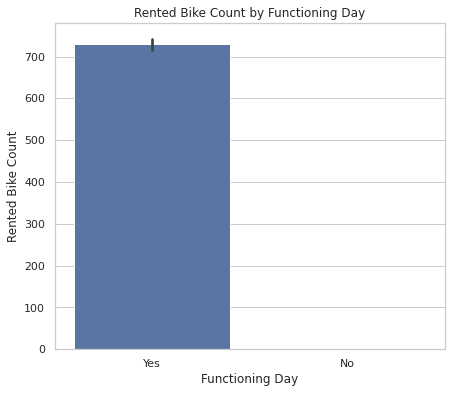

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y='Rented Bike Count', x='Functioning Day', data=df)
plt.title("Rented Bike Count by Functioning Day")
plt.ylabel("Rented Bike Count")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<AxesSubplot:>

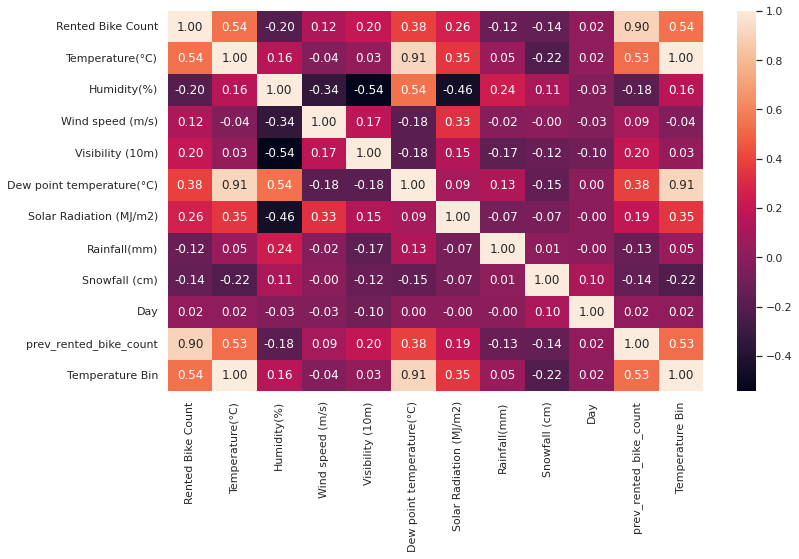

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr, annot = True, fmt='.2f')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Line Plot - Average Rented Bike Count by Hour for each Seasons

Text(0.5, 1.0, 'Rented Bike Count trend by Hour for each Seasons')

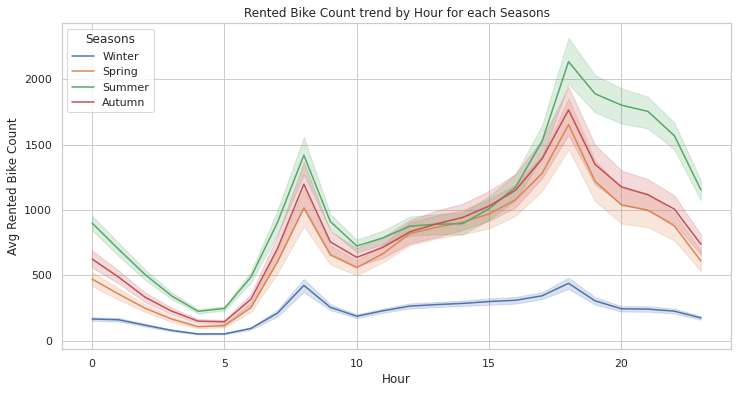

In [105]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Hour", y="Rented Bike Count", hue="Seasons", data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour for each Seasons")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 1.0, 'Rented Bike Count by Snowfall (cm)')

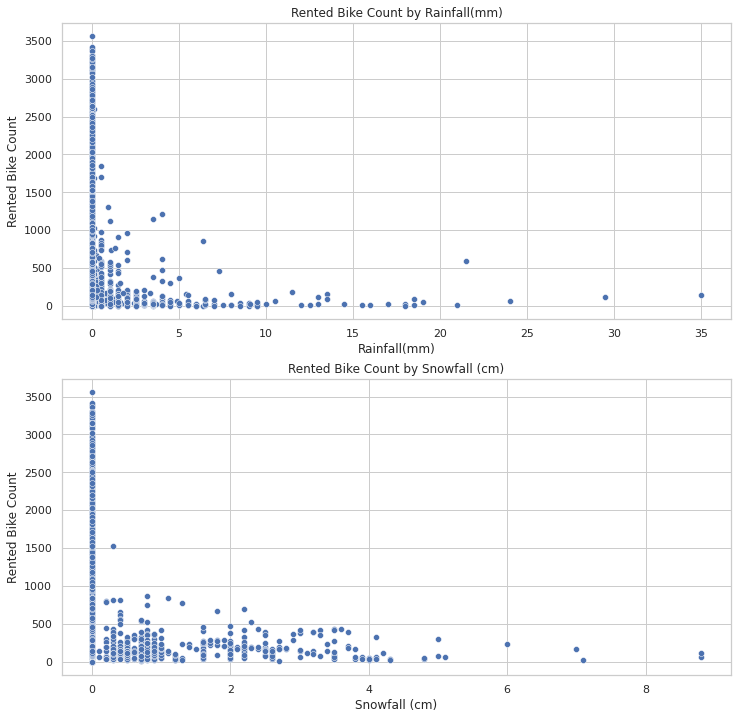

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=df)
plt.title("Rented Bike Count by Rainfall(mm)")

plt.subplot(2,1,2)
sns.scatterplot(x='Snowfall (cm)', y='Rented Bike Count', data=df)
plt.title("Rented Bike Count by Snowfall (cm)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Avg Rented Bike Count by Holiday

Text(0, 0.5, 'Avg Rented Bike Count')

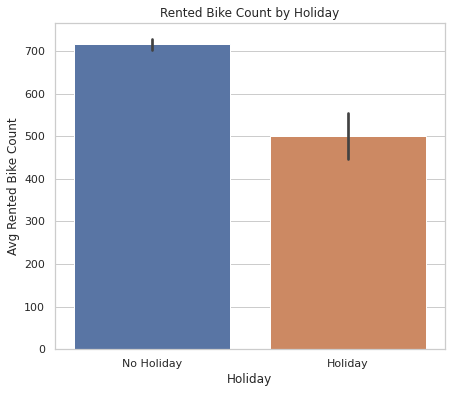

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y='Rented Bike Count', x='Holiday', data=df)
plt.title("Rented Bike Count by Holiday")
plt.ylabel("Avg Rented Bike Count")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Temperature and Solar Radiation over time

Text(0.5, 1.0, 'Solar Radiation (MJ/m2) by Date for each Year')

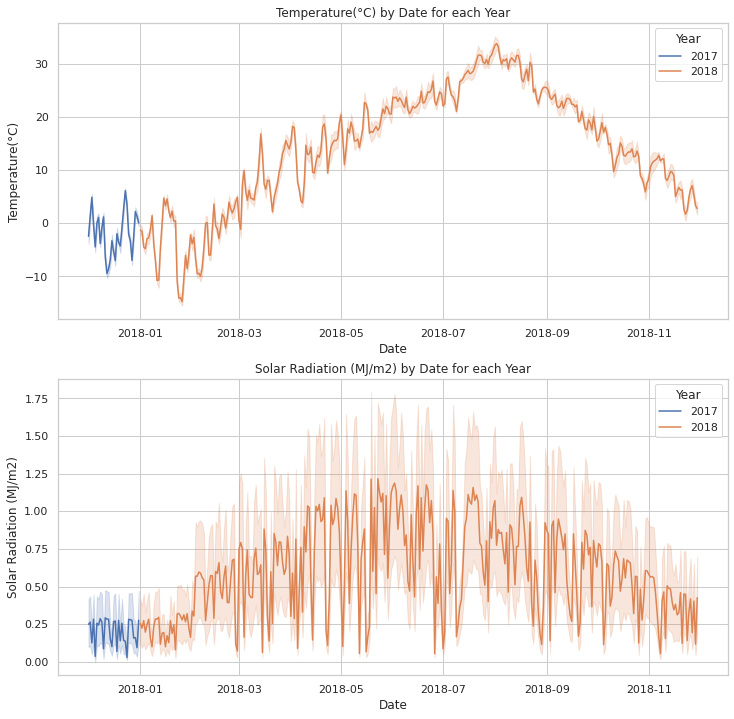

In [ ]:
plt.figure(figsize=(12, 12))

# Plot temperature
plt.subplot(2, 1, 1)
sns.lineplot(x='Date', y='Temperature(°C)', hue='Year', data=df)
plt.ylabel('Temperature(°C)')
plt.title("Temperature(°C) by Date for each Year")

# Plot humidity
plt.subplot(2, 1, 2)
sns.lineplot(x='Date', y='Solar Radiation (MJ/m2)', hue='Year', data=df)
plt.ylabel('Solar Radiation (MJ/m2)')
plt.title("Solar Radiation (MJ/m2) by Date for each Year")

# # Plot humidity
# plt.subplot(3, 1, 3)
# sns.lineplot(x='Date', y='Humidity(%)', hue='Year', data=df)
# plt.ylabel('Humidity (%)')
# plt.title("Humidity (%) by Date for each Year")

# # Plot wind speed
# plt.subplot(3, 1, 4)
# sns.lineplot(x='Date', y='Wind speed (m/s)', hue='Year', data=df)
# plt.ylabel('Wind speed (m/s)')
# plt.title("Wind speed (m/s) by Date for each Year")


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Avg Rented Bike Count by Wind speed (m/s)

Text(0.5, 1.0, 'Avg Rented Bike Count by Wind speed (m/s)')

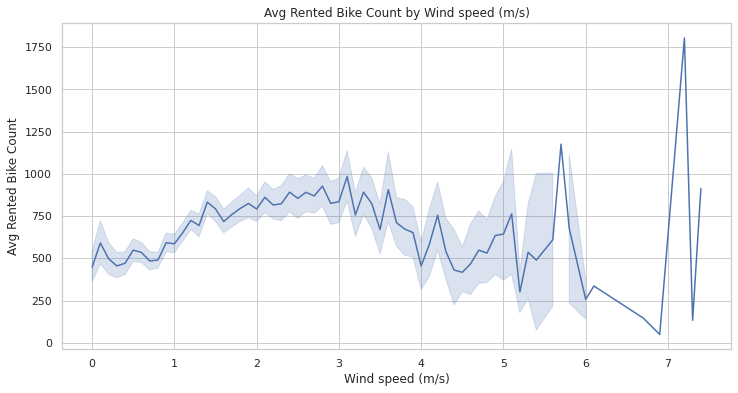

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Avg Rented Bike Count by Wind speed (m/s)")

In [ ]:
df['Wind speed (m/s)'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Avg Rented Bike Count by Humidity (%)

Text(0.5, 1.0, 'Avg Rented Bike Count by Humidity(%)')

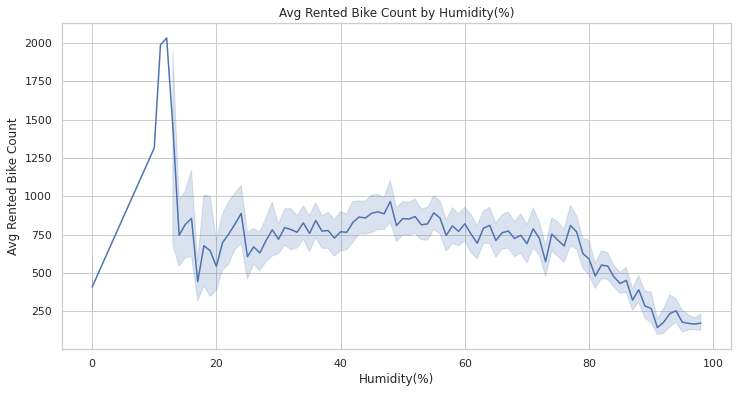

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Humidity(%)', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Avg Rented Bike Count by Humidity(%)")

In [ ]:
df['Humidity(%)'].value_counts()

53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 90, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Rented Bike Count trend by Visibility

Text(0.5, 1.0, 'Rented Bike Count by Visibility (10m)')

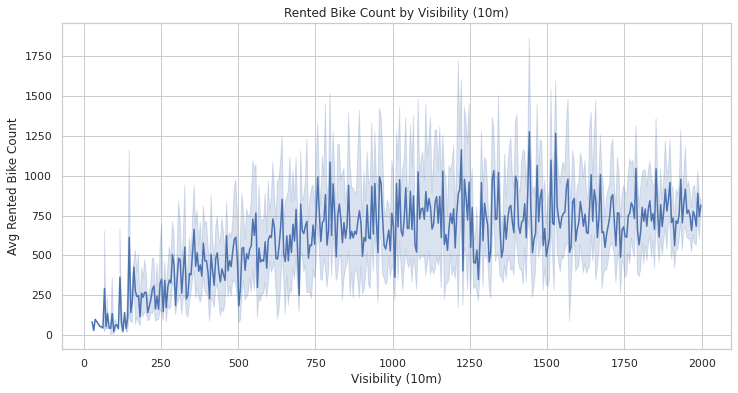

In [ ]:
d = df.copy()
# Create bins of width 5 for the "Visibility (10m)" variable
bins = range(0, 2005, 5)

# Add a new column to the dataframe containing the bin labels
d['Visibility (10m) bin'] = pd.cut(d['Visibility (10m)'], bins=bins, include_lowest=True)
# Replacing bins with their mid values for better visualization axis labels
d['Visibility (10m) bin'] = d['Visibility (10m) bin'].apply(lambda x: x.mid)

plt.figure(figsize=(12,6))
sns.lineplot(x='Visibility (10m) bin', y='Rented Bike Count', data=d)
plt.xlabel('Visibility (10m)')
plt.ylabel('Avg Rented Bike Count')
plt.title("Rented Bike Count by Visibility (10m)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 16 - Column wise Histogram & Box Plot Univariate Analysis

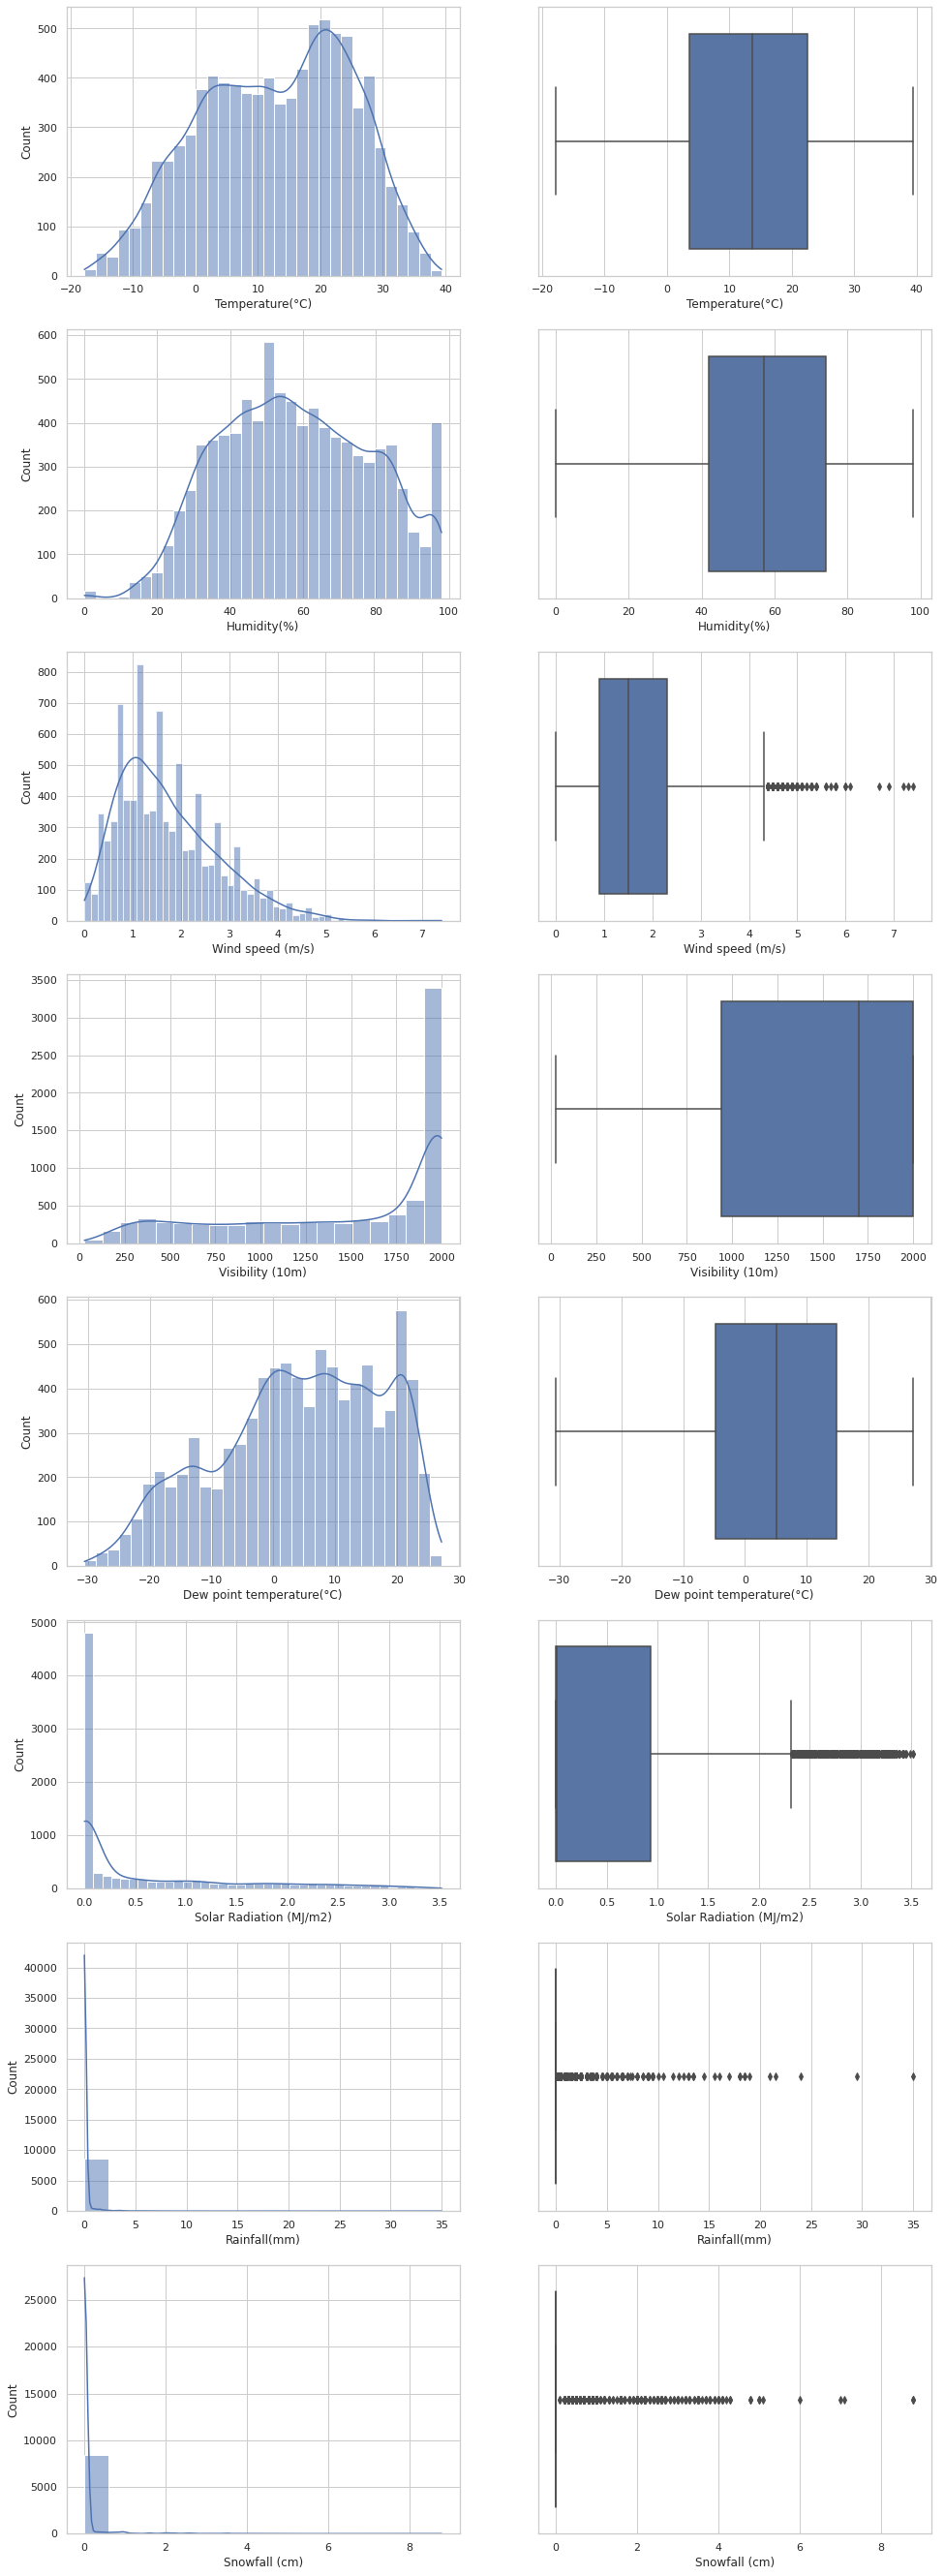

In [ ]:
# Numeric Columns
num_cols = ['Temperature(°C)', 'Humidity(%)',
        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
        'Solar Radiation (MJ/m2)', 'Rainfall(mm)',	'Snowfall (cm)']

n = len(num_cols)
plt.figure(figsize=(16, 48))

i = 1
for col in num_cols:
  plt.subplot(n, 2, i)
  sns.histplot(x=df[col], kde=True)
  plt.subplot(n, 2, i+1)
  sns.boxplot(x=df[col])
  i += 2

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.   Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.
2.   Rented Bike Demand during **rush hour** (*7-9AM & 5-7PM*) and **non-rush hour** are different.
3.   Average Rented Bike Demand is different in different seasons.

### Hypothetical Statement - 1

Rented Bike Demand in **hot weather** is higher compared to demand in **cold weather**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: $H_o : μ_{cold} = μ_{hot}$

Alternate Hypothesis : $H_1 : μ_{cold} \neq μ_{hot}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Split the data into the 'hot' and 'cold' temperature groups
hot_temps = df[df['Temperature(°C)'] >= 20]['Rented Bike Count']
cold_temps = df[df['Temperature(°C)'] < 20]['Rented Bike Count']

In [ ]:
print("Cold temperature Bike Demand Variance: ", np.var(cold_temps))
print("Hot temperature Bike Demand Variance: ", np.var(hot_temps))

Cold temperature Bike Demand Variance:  243195.07698899662
Hot temperature Bike Demand Variance:  505140.86009853514


In [ ]:
# Sample sizes for different temperature groups
print("Hot Temp sample size:", hot_temps.shape[0])
print("Cold Temp sample size:", cold_temps.shape[0])

Hot Temp sample size: 2928
Cold Temp sample size: 5832


In [ ]:
# Perform the t-test
t_stat, p_val = scipy.stats.ttest_ind(hot_temps, cold_temps, equal_var=False)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.")

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in mean bike rentals between the 'hot' and 'cold' temperature groups.


##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in hot temperatures and cold temperaures.

##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of *Rented Bike Count* between the *hot* and *cold* temperature groups.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e., $n_{hot}=2928$ & $n_{cold}=5832$) and we **don't know $\sigma_{p}$**.

### Hypothetical Statement - 2

Rented Bike Demand during **rush hour** (*7-9AM & 5-7PM*) and **non-rush hour** are different.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: $H_o : μ_{rush} = μ_{non-rush}$

Alternate Hypothesis : $H_1 : μ_{rush} \neq μ_{non-rush}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [106]:
# Create subsets of the data based on hour
rush_hour = df[(df['Hour'] >= 7) & (df['Hour'] <= 9) | (df['Hour'] >= 17) & (df['Hour'] <= 19)]['Rented Bike Count']
non_rush_hour = df[~((df['Hour'] >= 7) & (df['Hour'] <= 9) | (df['Hour'] >= 17) & (df['Hour'] <= 19))]['Rented Bike Count']

In [107]:
print("Rush Hour Bike Demand Variance: ", np.var(rush_hour))
print("Non-Rush Hour Bike Demand Variance: ", np.var(non_rush_hour))

Rush Hour Bike Demand Variance:  651191.7549925982
Non-Rush Hour Bike Demand Variance:  294088.66494823346


In [108]:
# Sample sizes for different hours
print("Rush Hour sample size:", rush_hour.shape[0])
print("Non-Rush Hour sample size:", non_rush_hour.shape[0])

Rush Hour sample size: 2190
Non-Rush Hour sample size: 6570


In [109]:
# Conduct a two-sample t-test to compare the mean bike rental demand during rush hour with the mean bike rental demand during non-rush hour times
t_stat, p_val = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

# Print the t-test results
# print('t-statistic:', t_stat)
# print('p-value:', p_val)

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.")

Since p-value (9.381784283723713e-104) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in mean bike rentals between the 'rush hour' and 'non-rush hour' times of day.


##### Which statistical test have you done to obtain P-Value?

I have used Two sample T-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts different in rush hours and non-rush hours.

##### Why did you choose the specific statistical test?

The two sample t-test is used to determine if there is a significant difference between the means of two groups, making it an appropriate test for comparing the mean number of Rented Bike Count between the rush hours and non-rush hours.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e.,  $n_{rush}=2190$  &  $n_{non-rush}=6570$) and we **don't know $\sigma_{p}$**.

### Hypothetical Statement - 3

Average Rented Bike Demand is different in different seasons.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: $H_o :$ **No significant difference** between rented bike counts for different seasons.

Alternate Hypothesis : $H_1 :$ **Significant difference** between rented bike counts for different seasons.

Test Type: One-way ANOVA test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Sample sizes for different seasons
df.groupby('Seasons')['Rented Bike Count'].count()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Rented Bike Count, dtype: int64

In [ ]:
# Group the data by season and calculate the mean number of bike rentals for each season
season_means = df.groupby('Seasons')['Rented Bike Count'].mean()

# Conduct the ANOVA test
f_stat, p_value = scipy.stats.f_oneway(df.loc[df['Seasons']=='Spring', 'Rented Bike Count'],
                                  df.loc[df['Seasons']=='Summer', 'Rented Bike Count'],
                                  df.loc[df['Seasons']=='Autumn', 'Rented Bike Count'],
                                  df.loc[df['Seasons']=='Winter', 'Rented Bike Count'])

# Print the results
print('F-statistic:', f_stat)
print('p-value:', p_val)
print()

# Conduct Tukey's HSD test for detailed difference b/w each groups
tukey_results = pairwise_tukeyhsd(df['Rented Bike Count'], df['Seasons'])

# Print the Tukey HSD test results
print(tukey_results)


F-statistic: 776.4678149879506
p-value: 0.0

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
Autumn Spring  -89.5667   0.0 -134.0266  -45.1069   True
Autumn Summer  214.4754   0.0  170.0156  258.9352   True
Autumn Winter -594.0568   0.0 -638.7616  -549.352   True
Spring Summer  304.0421   0.0  259.7039  348.3803   True
Spring Winter   -504.49   0.0 -549.0739 -459.9062   True
Summer Winter -808.5322   0.0  -853.116 -763.9483   True
--------------------------------------------------------


##### Which statistical test have you done to obtain P-Value?

I have used One-way ANOVA test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Mean Rented Bike counts are significantly different in different seasons.

##### Why did you choose the specific statistical test?

The one-way ANOVA test is used to determine if there is a significant difference between the means of **more than two groups**, making it an appropriate test for comparing the mean number of Rented Bike Count between different seasons.

Also We know from previous charts that **Rented Bike Count** is **right skewed** with **large sample sizes** (i.e.,  $n_{autumn}=2184$, $n_{spring}=2208$, $n_{summer}=2208$ , $n_{winter}=2160$).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [131]:
df.isna().sum().sum()

1

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [113]:
# From chart 16 above, we know following columns have outliers
outlier_cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [114]:
# Upper & Lower Boundary using IQR method
def getOutlierBoundaryIQR(df, feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.75)+3*IQR
  return upper_bridge,lower_bridge

In [115]:
# Unique values and their counts for Rainfall(mm)
df['Rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

We see that most of rows have value 0.0 and very few fave non-zero value. Which is understandable because we don't see rain everyday. Given the nature of data, it is unlikely that the non-zero values represent outliers. However value that is significantly higher can be treated as outlier.

In [116]:
# Upper & Lower boundary for Rainfall(mm) using IQR method
ub, lb = getOutlierBoundaryIQR(df, 'Rainfall(mm)')
print(f"Boundary: [{ub}, {lb}]")
print("99th Percentile:", df['Rainfall(mm)'].quantile(0.99))

Boundary: [0.0, 0.0]
99th Percentile: 4.0


we see both boundries are zero because of majority of data being zero. So we'll apply 99 quantile for capping outlier.

In [117]:
rainfall_99th = df['Rainfall(mm)'].quantile(0.99)
df['Rainfall(mm)_capped'] = df['Rainfall(mm)'].clip(upper=rainfall_99th)

In [118]:
# Upper & Lower boundary using IQR method
ub, lb = getOutlierBoundaryIQR(df, 'Snowfall (cm)')
print(f"Boundary: [{ub}, {lb}]")
print("99th Percentile:", df['Snowfall (cm)'].quantile(0.99))

Boundary: [0.0, 0.0]
99th Percentile: 2.5


Similarly case is in **Snowfall (cm)**

In [119]:
snowfall_99th = df['Snowfall (cm)'].quantile(0.99)
df['Snowfall(cm)_capped'] = df['Snowfall (cm)'].clip(upper=snowfall_99th)

In [ ]:
# num_cols = ['Temperature(°C)', 'Humidity(%)',
#         'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
#         'Solar Radiation (MJ/m2)', 'Rainfall(mm)',	'Snowfall (cm)']
# symmetric_feature=[]
# non_symmetric_feature=[]
# for i in num_cols:
#   if abs(df[i].mean()-df[i].median())<0.2:
#     symmetric_feature.append(i)
#   else:
#     non_symmetric_feature.append(i)
# print("Symmertic: ",symmetric_feature)
# print("Non-Symmetric: ", non_symmetric_feature)

Symmertic:  ['Rainfall(mm)', 'Snowfall (cm)']
Non-Symmetric:  ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']


In [ ]:
# print("==0", df[df['Rainfall(mm)']==0].shape)
# print("0-1", df[((df['Rainfall(mm)']>0) & (df['Rainfall(mm)']<=1))].shape)
# print("1-2", df[((df['Rainfall(mm)']>1) & (df['Rainfall(mm)']<=2))].shape)
# print("2-3", df[((df['Rainfall(mm)']>2) & (df['Rainfall(mm)']<=3))].shape)
# print("3-4", df[((df['Rainfall(mm)']>3) & (df['Rainfall(mm)']<=4))].shape)
# print("4-5", df[((df['Rainfall(mm)']>4) & (df['Rainfall(mm)']<=5))].shape)
# print("5-6", df[((df['Rainfall(mm)']>5) & (df['Rainfall(mm)']<=6))].shape)
# print("6-7", df[((df['Rainfall(mm)']>6) & (df['Rainfall(mm)']<=7))].shape)
# print("7-8", df[((df['Rainfall(mm)']>7) & (df['Rainfall(mm)']<=8))].shape)
# print("8-9", df[((df['Rainfall(mm)']>8) & (df['Rainfall(mm)']<=9))].shape)
# print("9-10", df[((df['Rainfall(mm)']>9) & (df['Rainfall(mm)']<=10))].shape)
# print("10-15", df[((df['Rainfall(mm)']>10) & (df['Rainfall(mm)']<=15))].shape)
# print("15-20", df[((df['Rainfall(mm)']>15) & (df['Rainfall(mm)']<=20))].shape)
# print(">20", df[df['Rainfall(mm)']>20].shape)

In [ ]:
# print("==0", df[df['Rainfall(mm)']==0]['Rented Bike Count'].mean())
# print("0-1", df[((df['Rainfall(mm)']>0) & (df['Rainfall(mm)']<=1))]['Rented Bike Count'].mean())
# print("1-2", df[((df['Rainfall(mm)']>1) & (df['Rainfall(mm)']<=2))]['Rented Bike Count'].mean())
# print("2-3", df[((df['Rainfall(mm)']>2) & (df['Rainfall(mm)']<=3))]['Rented Bike Count'].mean())
# print("3-4", df[((df['Rainfall(mm)']>3) & (df['Rainfall(mm)']<=4))]['Rented Bike Count'].mean())
# print("4-5", df[((df['Rainfall(mm)']>4) & (df['Rainfall(mm)']<=5))]['Rented Bike Count'].mean())
# print("5-6", df[((df['Rainfall(mm)']>5) & (df['Rainfall(mm)']<=6))]['Rented Bike Count'].mean())
# print("6-7", df[((df['Rainfall(mm)']>6) & (df['Rainfall(mm)']<=7))]['Rented Bike Count'].mean())
# print("7-8", df[((df['Rainfall(mm)']>7) & (df['Rainfall(mm)']<=8))]['Rented Bike Count'].mean())
# print("8-9", df[((df['Rainfall(mm)']>8) & (df['Rainfall(mm)']<=9))]['Rented Bike Count'].mean())
# print("9-10", df[((df['Rainfall(mm)']>9) & (df['Rainfall(mm)']<=10))]['Rented Bike Count'].mean())
# print("10-15", df[((df['Rainfall(mm)']>10) & (df['Rainfall(mm)']<=15))]['Rented Bike Count'].mean())
# print("15-20", df[((df['Rainfall(mm)']>15) & (df['Rainfall(mm)']<=20))]['Rented Bike Count'].mean())
# print(">20", df[df['Rainfall(mm)']>20]['Rented Bike Count'].mean())

In [120]:
# Upper & Lower boundary using IQR method for Wind Speed (m/s)
ub, lb = getOutlierBoundaryIQR(df, 'Wind speed (m/s)')
print(f"Boundary: [{ub}, {lb}]")

Boundary: [6.499999999999999, -3.2999999999999994]


In [121]:
ub, lb = getOutlierBoundaryIQR(df, 'Wind speed (m/s)')
df['Wind speed (m/s)_capped'] = df['Wind speed (m/s)'].clip(lower=lb, upper=ub)

In [122]:
# Upper & Lower boundary using IQR method for Solar Radiation (MJ/m2)
ub, lb = getOutlierBoundaryIQR(df, 'Solar Radiation (MJ/m2)')
print(f"Boundary: [{ub}, {lb}]")

Boundary: [3.72, -2.79]


In [123]:
ub, lb = getOutlierBoundaryIQR(df, 'Solar Radiation (MJ/m2)')
df['Solar Radiation (MJ/m2)_capped'] = df['Solar Radiation (MJ/m2)'].clip(lower=lb, upper=ub)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            8760 non-null   datetime64[ns]
 1   Rented Bike Count               8760 non-null   int64         
 2   Hour                            8760 non-null   int64         
 3   Temperature(°C)                 8760 non-null   float64       
 4   Humidity(%)                     8760 non-null   int64         
 5   Wind speed (m/s)                8760 non-null   float64       
 6   Visibility (10m)                8760 non-null   int64         
 7   Dew point temperature(°C)       8760 non-null   float64       
 8   Solar Radiation (MJ/m2)         8760 non-null   float64       
 9   Rainfall(mm)                    8760 non-null   float64       
 10  Snowfall (cm)                   8760 non-null   float64       
 11  Seas

In [ ]:
# Encode your categorical columns

In [125]:
d = df[['Seasons', 'Holiday','Functioning Day', 'Month', 'weekday']]
encoded_df = pd.get_dummies(d, drop_first=True)
df = pd.concat([df, encoded_df], axis=1)
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,weekday,Temperature Bin,prev_rented_bike_count,Rainfall(mm)_capped,Snowfall(cm)_capped,Wind speed (m/s)_capped,Solar Radiation (MJ/m2)_capped,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,-5,NaN,0.0,0.0,2.2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,-6,254.0,0.0,0.0,0.8,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [130]:
# is_weekend feature can help capture any weekday/weekend patterns in the bike rental demand.
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [147]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [148]:
# Removing data of non functional days (non rented days)
df = df.drop(df[df['Functioning Day'] == 'No'].index)

# Since all values in Functioning Day Column is same, removing Functioning Day Column
df = df.drop(['Functioning Day'], axis = 1)

In [193]:
# # Lagged features: the number of rented bikes during the previous hour or day can be useful in capturing any trends or patterns in the data.
# d = pd.concat([df['Rented Bike Count'], df['Rented Bike Count'].shift(1), df['Rented Bike Count'].shift(2), df['Rented Bike Count'].shift(24)], axis=1)
# d.columns = ['rent_bike_count','lag1_rent_bike_count','lag2_rent_bike_count','lag24_rent_bike_count']
# d.corr()

In [194]:
# # Creating lagged feature prev_rented_bike_count (lag 1)
# df['prev_rented_bike_count'] = df['Rented Bike Count'].shift(1)

In [197]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day,weekday,Temperature Bin,Rainfall(mm)_capped,Snowfall(cm)_capped,Wind speed (m/s)_capped,Solar Radiation (MJ/m2)_capped,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,Friday,-5,0.0,0.0,2.2,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,Friday,-6,0.0,0.0,0.8,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,Friday,-6,0.0,0.0,1.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [153]:
# df = df.fillna(method='bfill')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting}

In [199]:
df.shape

(8465, 45)

In [198]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Year', 'Month', 'Day', 'weekday', 'Temperature Bin',
       'Rainfall(mm)_capped', 'Snowfall(cm)_capped', 'Wind speed (m/s)_capped',
       'Solar Radiation (MJ/m2)_capped', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'is_weekend'],
      dtype='object')

In [201]:
filtered_features = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)_capped', 'Snowfall(cm)_capped', 'Wind speed (m/s)_capped',
       'Solar Radiation (MJ/m2)_capped', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'is_weekend'] #'prev_rented_bike_count'

df2 = df[filtered_features]
df2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C),Rainfall(mm)_capped,Snowfall(cm)_capped,Wind speed (m/s)_capped,Solar Radiation (MJ/m2)_capped,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_weekend
0,254,0,-5.2,37,2000,-17.6,0.0,0.0,2.2,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,204,1,-5.5,38,2000,-17.6,0.0,0.0,0.8,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [202]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

In [203]:
calc_vif(df2.select_dtypes(include=['float','int']).drop('Rented Bike Count', axis=1))

,feature,VIF
1,Temperature(°C),33.678675
4,Dew point temperature(°C),17.629784
3,Visibility (10m),9.157289
2,Humidity(%),5.803109
7,Wind speed (m/s)_capped,4.837381
0,Hour,4.419686
8,Solar Radiation (MJ/m2)_capped,2.866329
9,is_weekend,1.416439
5,Rainfall(mm)_capped,1.174577
6,Snowfall(cm)_capped,1.150386


In [204]:
# Dew Point Temperature is highly correlated, hence dropping Dew point Temperature
del df2['Dew point temperature(°C)']

In [205]:
calc_vif(df2.select_dtypes(include=['float','int']).drop(['Rented Bike Count'], axis=1))

,feature,VIF
2,Humidity(%),5.238139
3,Visibility (10m),4.859556
6,Wind speed (m/s)_capped,4.633048
0,Hour,3.955038
1,Temperature(°C),3.216633
7,Solar Radiation (MJ/m2)_capped,2.246156
8,is_weekend,1.386784
4,Rainfall(mm)_capped,1.170751
5,Snowfall(cm)_capped,1.150254


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**Temperature(°C)** and **Humidity(%)** is already approx normal.
Transformed **Wind speed (m/s)_capped** to approx normal using *np.sqrt*


Text(0.5, 1.0, 'Rented Bike Count (sqrt) Distribution')

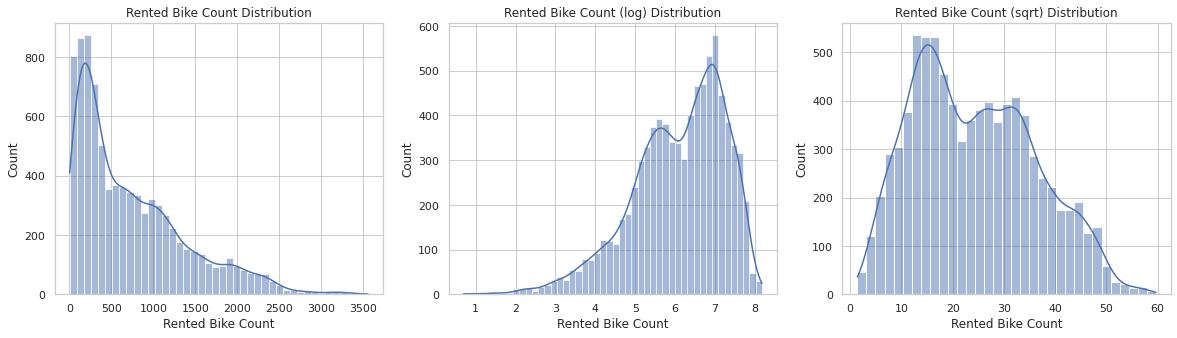

In [239]:
# Transforming 'Rented Bike Count' to normal
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(x='Rented Bike Count', data=df2, kde=True)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,3,2)
sns.histplot(np.log(df2['Rented Bike Count']), kde=True)
plt.title("Rented Bike Count (log) Distribution")

plt.subplot(1,3,3)
sns.histplot(np.sqrt(df2['Rented Bike Count']), kde=True)
plt.title("Rented Bike Count (sqrt) Distribution")

In [240]:
df2['Rented Bike Count'] = np.sqrt(df2['Rented Bike Count'])

<ipython-input-240-7eddb5441c50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rented Bike Count'] = np.sqrt(df2['Rented Bike Count'])


In [241]:
df2['Wind speed (m/s)_capped'] = np.sqrt(df2['Wind speed (m/s)_capped'])

<ipython-input-241-df7963ae2f16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Wind speed (m/s)_capped'] = np.sqrt(df2['Wind speed (m/s)_capped'])


<AxesSubplot:xlabel='Wind speed (m/s)_capped', ylabel='Count'>

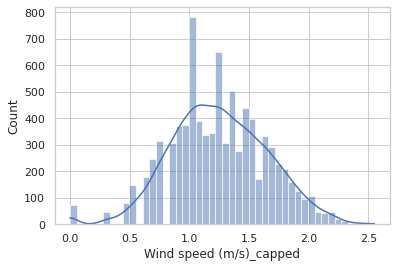

In [242]:
sns.histplot(x='Wind speed (m/s)_capped', data=df2, kde=True)

### 6. Data Scaling

In [266]:
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm)_capped,Snowfall(cm)_capped,Wind speed (m/s)_capped,Solar Radiation (MJ/m2)_capped,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_weekend
0,15.937377,0,-5.2,37,2000,0.0,0.0,1.483240,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,14.282857,1,-5.5,38,2000,0.0,0.0,0.894427,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,13.152946,2,-6.0,39,2000,0.0,0.0,1.000000,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10.344080,3,-6.2,40,2000,0.0,0.0,0.948683,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,8.831761,4,-6.0,36,2000,0.0,0.0,1.516575,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [267]:
# Standardizing the required column
df2['Temperature(°C)'] = StandardScaler().fit_transform(df2['Temperature(°C)'].values.reshape(-1, 1))
df2['Humidity(%)'] = StandardScaler().fit_transform(df2['Humidity(%)'].values.reshape(-1, 1))

# Normalizing the required column
df2['Visibility (10m)'] = MinMaxScaler().fit_transform(df2['Visibility (10m)'].values.reshape(-1, 1))

<ipython-input-267-1b1f8ea3a7ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Temperature(°C)'] = StandardScaler().fit_transform(df2['Temperature(°C)'].values.reshape(-1, 1))
<ipython-input-267-1b1f8ea3a7ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Humidity(%)'] = StandardScaler().fit_transform(df2['Humidity(%)'].values.reshape(-1, 1))
<ipython-input-267-1b1f8ea3a7ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [268]:
df2.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm)_capped,Snowfall(cm)_capped,Wind speed (m/s)_capped,Solar Radiation (MJ/m2)_capped,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_weekend
0,15.937377,0,-1.484762,-1.032395,1.0,0.0,0.0,1.483240,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,14.282857,1,-1.509548,-0.983575,1.0,0.0,0.0,0.894427,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,13.152946,2,-1.550858,-0.934756,1.0,0.0,0.0,1.000000,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10.344080,3,-1.567382,-0.885937,1.0,0.0,0.0,0.948683,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,8.831761,4,-1.550858,-1.081214,1.0,0.0,0.0,1.516575,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Which method have you used to scale you data and why?

When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

So in my data, range of data values for **Temperature(°C)**, **Humidity(%)** and **Visibility (10m)** was large and rest was not. Also Temperature(°C) and Humidity(%) was approx normally distributed hence used **StandardScaler** whereas used **MinMaxScaler** for Visibility (10m).

**NOTE:-** *The '**Hour**' column also does not need scaling, as it represents discrete values from 0 to 23.*

### 7. Dimesionality Reduction

In [269]:
df2.shape

(8465, 31)

##### Do you think that dimensionality reduction is needed? Explain Why?

With 30 columns (independent features) and 8465 rows, and after doing all the feature engineering steps like removing multicolinearity, feature selection manupulations etc. I don't think I need dimensionality reduction here.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [285]:
# Splitting data into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(df2.drop("Rented Bike Count", axis=1), df2["Rented Bike Count"], test_size = 0.25, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6348, 30)
Number transactions y_train dataset:  (6348,)
Number transactions X_test dataset:  (2117, 30)
Number transactions y_test dataset:  (2117,)


##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we should probably stick with cross validation as no single split is going to give you satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split.

It is surprising to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 75:25 ratio.

### 9. Handling Imbalanced Dataset

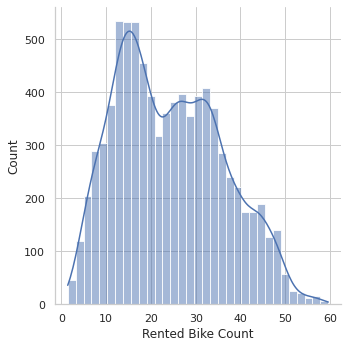

In [286]:
_ = sns.displot(x=df2['Rented Bike Count'], kde=True)

##### Do you think the dataset is imbalanced? Explain Why.

Looking at the distribution of traget variable (i.e., Rented Bike Count), values are not concentrated in a narrow range, and is normally distributed accross wide range of values. So the dataset is not imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [287]:
# ML Model - 1 Implementation
linear_reg = LinearRegression()
# Fit the Algorithm
linear_reg.fit(X_train, y_train)

LinearRegression()

In [291]:
# Predict on the model
train_preds = linear_reg.predict(X_train)
test_preds = linear_reg.predict(X_test)

In [338]:
mse = mean_squared_error(y_test, test_preds)
print("MSE:", mse)

mae = mean_absolute_error(y_test, test_preds)
print("MAE:", mae)

r2 = r2_score(y_test, test_preds)
print("R2 Score:", r2)

cv_score = cross_val_score(estimator = linear_reg, X=X_train, y=y_train, cv = 5).mean()
print("CV Score:", cv_score)

MSE: 45.505932037208744
MAE: 5.148391246683523
R2 Score: 0.6719050969245974
CV Score: 0.6700991700711241


In [339]:
# Dictionary to store different models accuracies
model_results = {}
model_results['Linear Regression'] = [r2, mse, mae, cv_score]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

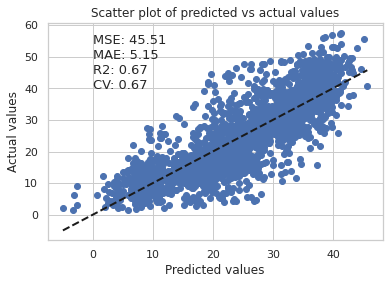

In [341]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(0, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}\nCV: {cv_score:.2f}', fontsize=13, ha='left')

plt.show()

Text(0, 0.5, 'Residuals')

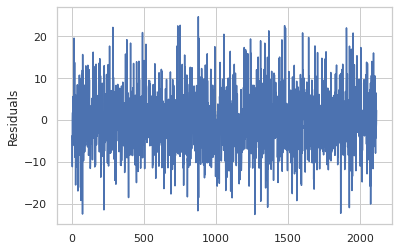

In [333]:
# Checking Homoscedasticity
residuals = y_test - test_preds

plt.figure(figsize=(6,4))
_ = sns.lineplot(x=list(range(1, len(residuals)+1)), y=residuals)
plt.ylabel('Residuals')

It looks like variance is almost constant, hence fulfilling Homoscedasticity assumption of Linear Regression.

#### 2. Cross- Validation & Hyperparameter Tuning

In [365]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LinearRegression()
params = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
grid_search.fit(X_train, y_train)
linear_reg_cv = grid_search.best_estimator_

# Predict on the model
train_preds = linear_reg_cv.predict(X_train)
test_preds = linear_reg_cv.predict(X_test)

In [366]:
mse = mean_squared_error(y_test, test_preds)
print("MSE:", mse)

mae = mean_absolute_error(y_test, test_preds)
print("MAE:", mae)

r2 = r2_score(y_test, test_preds)
print("R2 Score:", r2)

cv_score = cross_val_score(estimator = linear_reg_cv, X=X_train, y=y_train, cv = 5).mean()
print("CV Score:", cv_score)

MSE: 45.505932037209035
MAE: 5.148391246683574
R2 Score: 0.6719050969245952
CV Score: 0.6700991700711241


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No

### ML Model - 2 - Ridge

In [367]:
# ML Model - 2 Implementation
ridge = Ridge()
# Fit the Algorithm
ridge.fit(X_train, y_train)
# Predict on the model
train_preds = ridge.predict(X_train)
test_preds = ridge.predict(X_test)

In [368]:
mse = mean_squared_error(y_test, test_preds)
print("MSE:", mse)

mae = mean_absolute_error(y_test, test_preds)
print("MAE:", mae)

r2 = r2_score(y_test, test_preds)
print("R2 Score:", r2)

cv_score = cross_val_score(estimator = ridge, X=X_train, y=y_train, cv = 5).mean()
print("CV Score:", cv_score)

MSE: 45.508985079069724
MAE: 5.1486982064229005
R2 Score: 0.671883084685124
CV Score: 0.6701088513458993


In [369]:
model_results['Ridge'] = [r2, mse, mae, cv_score]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

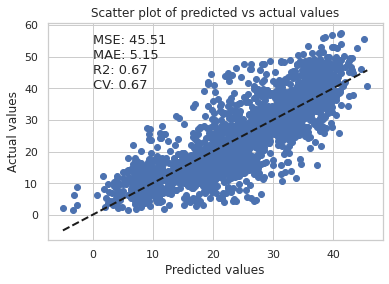

In [370]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(0, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}\nCV: {cv_score:.2f}', fontsize=13, ha='left')

plt.show()

Text(0, 0.5, 'Residuals')

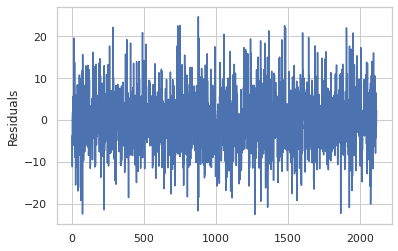

In [371]:
# Checking Homoscedasticity
residuals = y_test - test_preds

plt.figure(figsize=(6,4))
_ = sns.lineplot(x=list(range(1, len(residuals)+1)), y=residuals)
plt.ylabel('Residuals')

#### 2. Cross- Validation & Hyperparameter Tuning

In [374]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 50, 100]
}
ridge_cv = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(ridge_cv, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# Fit the Algorithm
grid_result = grid_search.fit(X_train, y_train)
ridge_cv = grid_search.best_estimator_

# Predict on the model
train_preds = ridge_cv.predict(X_train)
test_preds = ridge_cv.predict(X_test)

In [375]:
mse = mean_squared_error(y_test, test_preds)
print("MSE:", mse)

mae = mean_absolute_error(y_test, test_preds)
print("MAE:", mae)

r2 = r2_score(y_test, test_preds)
print("R2 Score:", r2)

cv_score = cross_val_score(estimator = ridge_cv, X=X_train, y=y_train, cv = 5).mean()
print("CV Score:", cv_score)

MSE: 45.49697778989846
MAE: 5.147335317359316
R2 Score: 0.6719696564835793
CV Score: 0.6701321737951821


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - ElasticNet

In [387]:
# ML Model - 3 Implementation
elastic = ElasticNet()
# Fit the Algorithm
elastic.fit(X_train, y_train)
# Predict on the model
train_preds = elastic.predict(X_train)
test_preds = elastic.predict(X_test)

In [388]:
mse = mean_squared_error(y_test, test_preds)
print("MSE:", mse)

mae = mean_absolute_error(y_test, test_preds)
print("MAE:", mae)

r2 = r2_score(y_test, test_preds)
print("R2 Score:", r2)

cv_score = cross_val_score(estimator = elastic, X=X_train, y=y_train, cv = 5).mean()
print("CV Score:", cv_score)

MSE: 68.86361296480185
MAE: 6.682779444537612
R2 Score: 0.5034976889906468
CV Score: 0.516799573949809


In [389]:
model_results['ElasticNet'] = [r2, mse, mae, cv_score]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

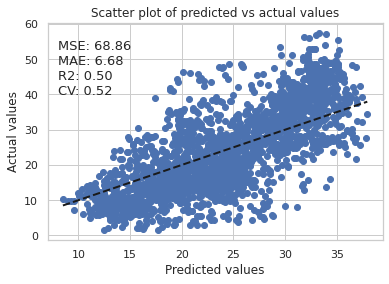

In [391]:
# Create scatter plot
plt.scatter(test_preds, y_test)
plt.plot([min(test_preds), max(test_preds)], [min(test_preds), max(test_preds)], 'k--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predicted vs actual values')

# Add evaluation metrics to plot
plt.text(8, 40, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}\nCV: {cv_score:.2f}', fontsize=13, ha='left')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [393]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'alpha': [0.01, 0.1, 1, 10, 100],
          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
          'fit_intercept': [True, False]
}
elastic_cv = ElasticNet()
grid_search = GridSearchCV(elastic_cv, params, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
grid_result = grid_search.fit(X_train, y_train)
elastic_cv = grid_search.best_estimator_

# Predict on the model
train_preds = elastic_cv.predict(X_train)
test_preds = elastic_cv.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 7.245e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+05, tolerance: 7.090e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

In [386]:
mse = mean_squared_error(y_test, test_preds)
print("MSE:", mse)

mae = mean_absolute_error(y_test, test_preds)
print("MAE:", mae)

r2 = r2_score(y_test, test_preds)
print("R2 Score:", r2)

cv_score = cross_val_score(estimator = lasso_cv, X=X_train, y=y_train, cv = 5).mean()
print("CV Score:", cv_score)

MSE: 45.506017662799294
MAE: 5.148403026129176
R2 Score: 0.671904479569484


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.115e+03, tolerance: 7.245e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.040e+03, tolerance: 7.090e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+03, tolerance: 7.130e+01

CV Score: 0.6700992019298648


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.451e+03, tolerance: 7.266e+01
  model = cd_fast.enet_coordinate_descent(


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***